# GitHub Bitcoin README 

### Project Description
The goal of the project is to web scrape Github Bitcon repositories and use README files to build a model to predict programming language of a repository.

In [14]:
#Imports
import pandas as pd
import wrangle as w
import explore as e
import model as m

## Acquire

- acquired data by scraping github repos README using the acquire.py script and saved locally as json file.
- Prior to cleaning it had 250 rows and 3 columns

In [15]:
# getting data from local json
df= pd.read_json('data2.json')

# peak into data
df.head()

,repo,language,readme_contents
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...
1,bitcoinbook/bitcoinbook,AsciiDoc,Code Examples: ![travis_ci](https://travis-ci....
2,bitcoinj/bitcoinj,Java,image:https://github.com/bitcoinj/bitcoinj/wor...
3,bitcoin/bips,Wikitext,"People wishing to submit BIPs, first should pr..."
4,bitcoinjs/bitcoinjs-lib,TypeScript,# BitcoinJS (bitcoinjs-lib)\n[![Github CI](htt...


##  Prepare
### Prepare Actions
- bin languages into 'Python', 'JavaScript', 'C++', 'Java','Other'

- clean readme 
    - convert words to lower case 
    - Remove any accented characters, non-ASCII characters
    - Remove special characters.
    - Lemmatize the words.
    - store the clean text into a column named readme_contetns_clean
    
- add columns 
    - readme_contents_clean: contains cleaned readme
    - length: lenght of clean readme
    - unique: number of unique words in clean readme
    
- split data into train, val, and test(approx. 60/20/20)

In [16]:
# get cleanded dataframe
df = w.prepare_df(df)

# peak into dataframe
df.head()

,repo,language,readme_contents,readme_contents_clean,length,unique
0,bitcoin/bitcoin,C++,Bitcoin Core integration/staging tree\n=======...,bitcoin core integration staging tree http bit...,3364,27
1,bitcoinj/bitcoinj,Java,image:https://github.com/bitcoinj/bitcoinj/wor...,image http github com bitcoinj bitcoinj workfl...,4642,35
2,spesmilo/electrum,Python,# Electrum - Lightweight Bitcoin client\n\n```...,electrum lightweight bitcoin client licence mi...,4270,36
3,bitcoin-wallet/bitcoin-wallet,Java,# BITCOIN WALLET\n\nWelcome to _Bitcoin Wallet...,bitcoin wallet welcome _bitcoin wallet_ standa...,1317,33
4,etotheipi/BitcoinArmory,C++,##Armory\n\n**Created by Alan Reiner on 13 Jul...,armory created alan reiner 13 july 2011 armory...,4101,38


In [17]:
# split data into train, val, and test
train, val, test = w.train_val_test(df, stratify= 'language')

##  Explore

### 1. What are the most common words in READMEs?

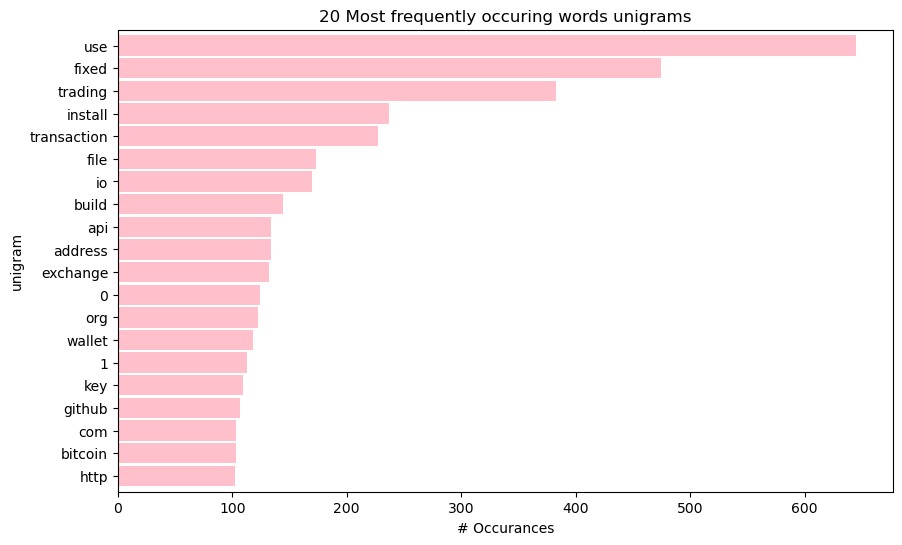

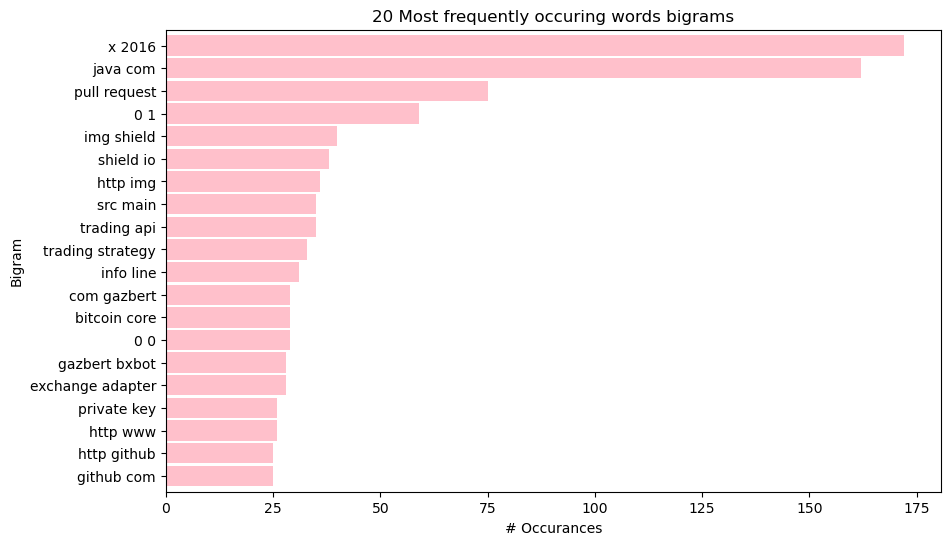

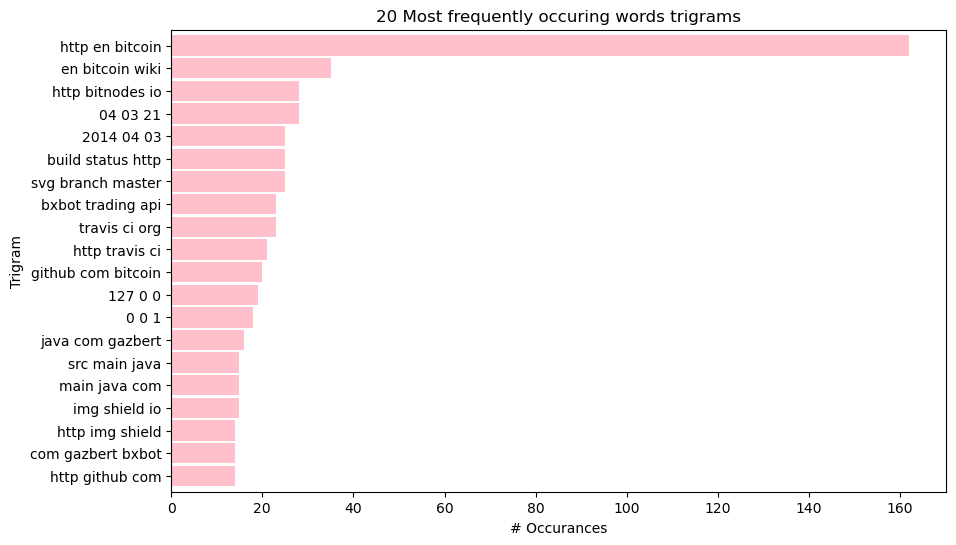

In [18]:
# function to get unigram, bigram, and trigram visuals
e.Q1(train)

#### Takeaway:
- 'using' is the most common unigrams
- 'npm install' is the most common bigrams
- 'http user pa' is the most common trigrams

### 2. Does the length of the README vary by programming language?

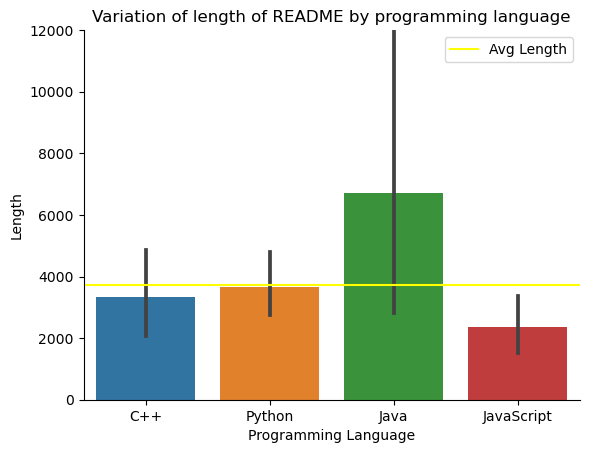

In [19]:
# function to get programming length visual
e.viz_length_content(train)

#### Takeaway:  
- JavaScript has the maximum lenght of README.
- C++ has the miminum length of README.
- length of README of JavaScript and Java are above average length of README.
- length of README of C++ and Python are below average length of README.


### 3. Do different programming languages use a different number of unique words?

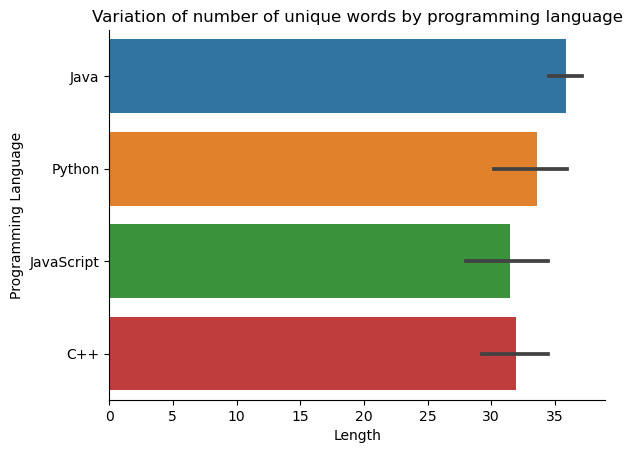

In [20]:
# function to get unique words visual
e.viz_count_unique(train)

#### Takeaway: 
- Java has the maximum number of unique words in README.
- C++ has the miminum number of unique words in README.
- length of README of JavaScript and Java are above average length of README.
- length of README of C++ and Python are below average length of README.

####  Explore Summary:
- 'using' is the most common unigrams
- 'npm install' is the most common bigrams
- 'http user pa' is the most common trigrams
- JavaScript has the maximum lenght of README.
- C++ has the miminum length of README.
- length of README of JavaScript and Java are above average length of README.
- length of README of C++ and Python are below average length of README.
- Java has the maximum number of unique words in README.
- C++ has the miminum number of unique words in README.


    

In [21]:
#isolate target
X_train, y_train, X_val, y_val, X_test, y_test = w.x_y_split(df, 'language')

### Model
- use train and val data on different models to get the model that performs the best.
- use the test data on the best model to get predictions.
- use my baseline accuracy as evaluation metric.
- use following four models to get the best model:
    - Decision Tree
    - KNN
    - Random Forest Tree


In [22]:
# get baseline if predicting python every time
m.get_baseline_accuracy(y_train)

Baseline accuracy: 39.0 %


### Baseline accuracy: 39%

In [23]:
# use TF-IDf
X_train_tfid, X_val_tfid, X_test_tfid = m.get_tfid(X_train, X_val, X_test, y_train, y_val, y_test)

In [24]:
# get a dataframe of models with train accuracy, validate accuracy and accuracy difference
models_df = m.get_models_accuracy(X_train_tfid, X_val_tfid, y_train, y_val)

# look into a dataframe
models_df

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be acce

,train_accuracy,validate_accuracy,difference
Decision_Tree,0.782609,0.782609,0.000000
Random_Forest,0.507246,0.608696,-0.101449
KNN,0.710145,0.695652,0.014493


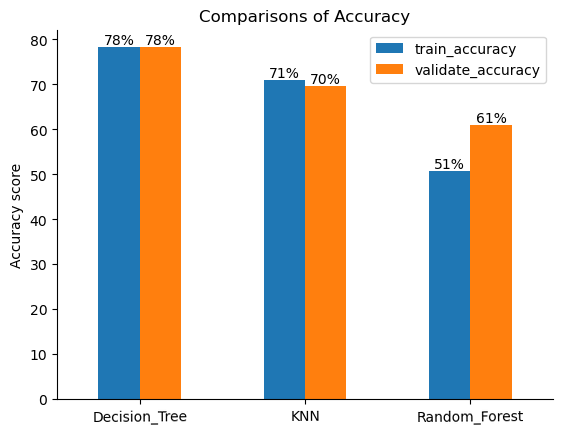

In [25]:
# function to get visual of top models to get train accuracy and validate accuracy
m.viz_models_accuracy(models_df)

####  Model Evaluation
- use test data on Decision Tree
####  Decision Tree with max_depth 4 has accuracy score of 76% on test data, which is a 95% improvement upon the baseline accuracy


In [26]:
# function to run best model on test set
m.get_decison_tree_test(X_train_tfid, X_test_tfid, y_train, y_test, 4)

Test Accuracy: 75.0 %


### Modeling Sumary

- All models perfomed better than baseline on train and validate data.
- All models perfomed worse on validate to train.
- Decision Tree with max_depth 4 performed best.
- Decision Tree with max_depth 4 has accuracy score of 75% which is 37% higher than the 
baseline accuracy

## Conclusion

- 'Using', 'npm install', and 'http user pa' were the top unigrams, bigrams and trigams respectively
- JavaScript had the longest README's
- Java had most unique word count
- Bitcoin was not among the most common words

## Recommendation and Next Steps
- Web Scraping takes time, so be patient
- Scrape many repos for larger sample, yielding more accurate models
- With more time would scrape more repos, try stemming instead of lemmatizing, and add more stop-words
